# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import spacy
from spacy import displacy
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
load_dotenv()

%matplotlib inline

In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key = api_key)

In [4]:
# Initialize Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Create Sentiment Analysis Function
def getSentiment(HEADLINES):
    
    # Create Empty Sentiment Analysis List
    sentiments = []
    
    # Iterate through every article
    for article in HEADLINES["articles"]:
        
        # Gather article information if information exists
        try:
            
            # Save Content
            text = article["content"]
            
            # Analyze Sentiment Polarity
            sentiment = analyzer.polarity_scores(text)
            
            # Save Compound Sentiment
            compound = sentiment["compound"]
            
            # Save Positive sentiment
            pos = sentiment["pos"]
            
            # Save Neutral sentiment
            neu = sentiment["neu"]   
            
            # Save Negative sentiment
            neg = sentiment["neg"]  
            
            # Append dictionaries to sentiment list
            sentiments.append({
                
                # Append Text
                "Text": text,
                
                # Append Compound Sentiment
                "Compound": compound,
                
                # Append Positive Sentiment
                "Positive": pos, 
                
                # Append Neutral Sentiment
                "Neutral": neu,  
                
                # Append Negative Sentiment
                "Negative": neu,                
                
            })
            
        # Address Attirbute Errors
        except AttributeError:
            
            # Pass Article
            pass
        
        # Create DataFrame
        df = pd.DataFrame(sentiments)
        
        # Reorder Columns
        cols = ["Compound", "Positive", "Neutral", "Negative", "Text"]
        
        # Save Reordered DataFrame
        df = df[cols]
        
        # Return DataFrame
        return df

In [5]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q='bitcoin', language="en", page_size=100, sort_by="relevancy")

In [6]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q='ethereum', language="en", page_size=100, sort_by="relevancy")

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = getSentiment(btc_headlines)

# Show DataFrame
btc_df

,Compound,Positive,Neutral,Negative,Text
0,-0.2924,0.0,0.941,0.941,The government of India is considering an 18% ...


In [36]:
# Create the ethereum sentiment scores DataFrame
eth_df = getSentiment(eth_headlines)

# Show DataFrame
eth_df

,Compound,Positive,Neutral,Negative,Text
0,0.3412,0.074,0.926,0.926,Cryptocurrencies stole headlines on the first ...


In [37]:
# Describe the Bitcoin Sentiment
btc_describe = btc_df.describe()

# Show describe
btc_describe

,Compound,Positive,Neutral,Negative
count,1.0000,1.0,1.000,1.000
mean,-0.2924,0.0,0.941,0.941
std,NaN,NaN,NaN,NaN
min,-0.2924,0.0,0.941,0.941
25%,-0.2924,0.0,0.941,0.941
50%,-0.2924,0.0,0.941,0.941
75%,-0.2924,0.0,0.941,0.941
max,-0.2924,0.0,0.941,0.941


In [38]:
# Describe the Ethereum Sentiment
eth_describe = eth_df.describe()

# Show describe
eth_describe

,Compound,Positive,Neutral,Negative
count,1.0000,1.000,1.000,1.000
mean,0.3412,0.074,0.926,0.926
std,NaN,NaN,NaN,NaN
min,0.3412,0.074,0.926,0.926
25%,0.3412,0.074,0.926,0.926
50%,0.3412,0.074,0.926,0.926
75%,0.3412,0.074,0.926,0.926
max,0.3412,0.074,0.926,0.926


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [39]:
# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))

# Create word net lemmatizer instance
wnl = WordNetLemmatizer()

In [40]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in sw, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]

    # Return Tokens
    return tokens


In [41]:
# Create a new tokens column for bitcoin
btc_df['Tokens'] = btc_df["Text"].apply(tokenizer)

# Show DataFrame
btc_df

,Compound,Positive,Neutral,Negative,Text,Tokens
0,-0.2924,0.0,0.941,0.941,The government of India is considering an 18% ...,"[government, India, considering, 18, tax, bitc..."


In [42]:
# Create a new tokens column for ethereum
eth_df['Tokens'] = eth_df["Text"].apply(tokenizer)

# Show DataFrame
eth_df

,Compound,Positive,Neutral,Negative,Text,Tokens
0,0.3412,0.074,0.926,0.926,Cryptocurrencies stole headlines on the first ...,"[Cryptocurrencies, stole, headline, first, sto..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [45]:
# Generate the Bitcoin N-grams where N=2
Counter(ngrams(tokenizer(btc_df["Text"].str.cat()), 2)).most_common(10)

[(('government', 'India'), 1),
 (('India', 'considering'), 1),
 (('considering', '18'), 1),
 (('18', 'tax'), 1),
 (('tax', 'bitcoin'), 1),
 (('bitcoin', 'transaction'), 1),
 (('transaction', 'according'), 1),
 (('according', 'new'), 1),
 (('new', 'report'), 1),
 (('report', 'Times'), 1)]

In [46]:
# Generate the Ethereum N-grams where N=2
Counter(ngrams(tokenizer(eth_df["Text"].str.cat()), 2)).most_common(10)

[(('Cryptocurrencies', 'stole'), 1),
 (('stole', 'headline'), 1),
 (('headline', 'first'), 1),
 (('first', 'stock-market'), 1),
 (('stock-market', 'trading'), 1),
 (('trading', 'day'), 1),
 (('day', '2021'), 1),
 (('2021', 'bitcoin'), 1),
 (('bitcoin', 'ethereum'), 1),
 (('ethereum', 'selling'), 1)]

In [47]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [48]:
# Get the top 10 words for Bitcoin
token_count(tokenizer(btc_df["Text"].str.cat()), 10)

[('India', 2),
 ('tax', 2),
 ('government', 1),
 ('considering', 1),
 ('18', 1),
 ('bitcoin', 1),
 ('transaction', 1),
 ('according', 1),
 ('new', 1),
 ('report', 1)]

In [49]:
# Get the top 10 words for Ethereum
token_count(tokenizer(eth_df["Text"].str.cat()), 10)

[('Cryptocurrencies', 1),
 ('stole', 1),
 ('headline', 1),
 ('first', 1),
 ('stock-market', 1),
 ('trading', 1),
 ('day', 1),
 ('2021', 1),
 ('bitcoin', 1),
 ('ethereum', 1)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [50]:
# Save Plot Style
plt.style.use('seaborn-whitegrid')

# Save Figure Size
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [51]:
# Function for word cloud
def wordcloud(text, image_name, title=''):
    
    # Create instance
    df_cloud = WordCloud(width=500).generate(text)
    
    # Display data as an image
    plt.imshow(df_cloud)
    
    # Turn Axis off
    plt.axis('off')
    
    # Set Title
    plt.title(title)
    
    # Save Figure
    plt.savefig(f"{image_name}")
    
    # Show word cloud
    plt.show()

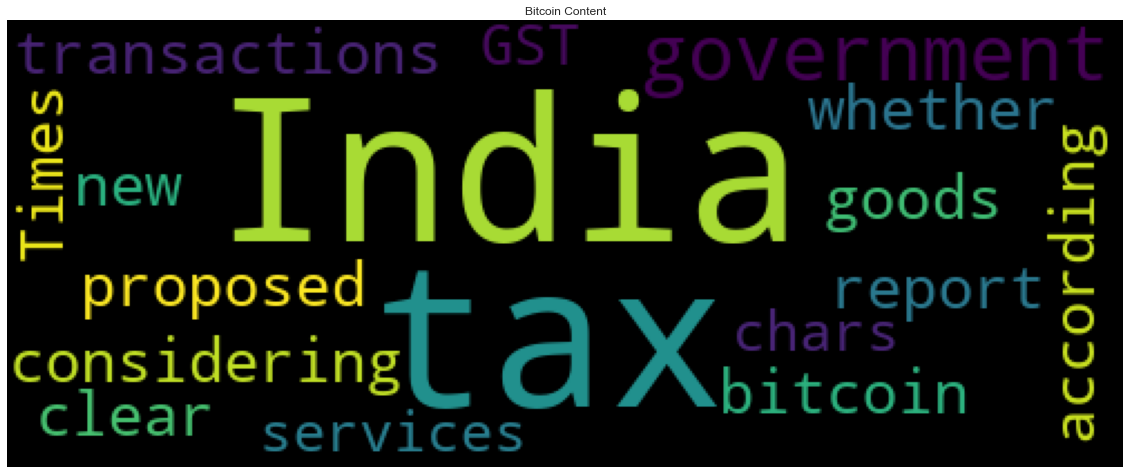

In [52]:
# Generate the Bitcoin word cloud
wordcloud(btc_df["Text"].str.cat(), 'btc_word_cloud.png', title='Bitcoin Content')

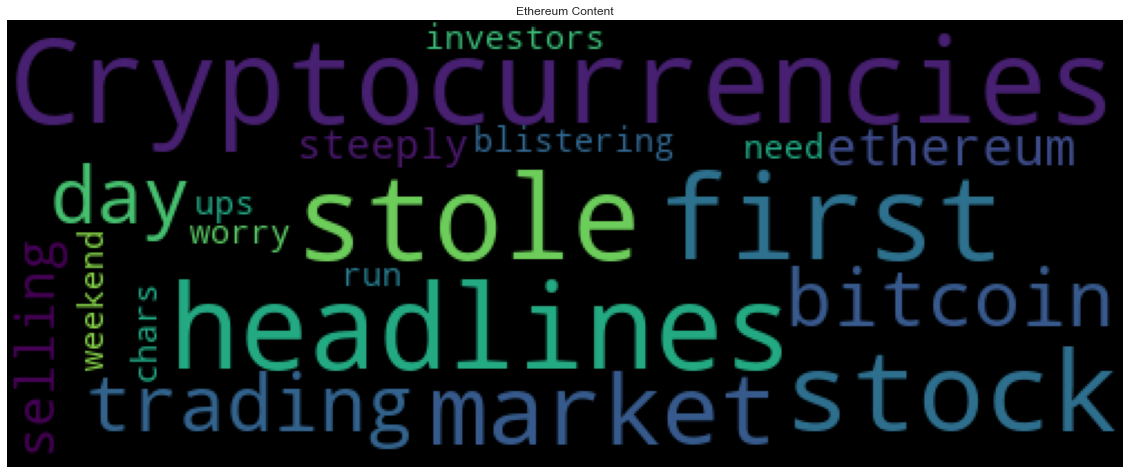

In [54]:
# Generate the Ethereum word cloud
wordcloud(eth_df["Text"].str.cat(), 'eth_word_cloud.png', title='Ethereum Content')

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [55]:
# Load SpaCy Model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [56]:
# Concatenate all of the bitcoin text together
all_btc_text = btc_df["Text"].str.cat()

# Show test
all_btc_text

'The government of India is considering an 18% tax on all bitcoin transactions, according to a new report from the Times of India. Its not clear whether the proposed goods and services tax (GST) would… [+1397 chars]'

In [57]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data['title'] = 'Bitcoin Name Entity Recognition'

In [58]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [59]:
# List all Entities
for ent in doc.ents:
    
    # Print Text and Label
    print(ent.text, ent.label_)

India GPE
18% PERCENT
bitcoin GPE
the Times of India ORG


---

## Ethereum NER

In [61]:
# Concatenate all of the Ethereum text together
all_eth_text = eth_df["Text"].str.cat()

# Show Text
all_eth_text

'Cryptocurrencies stole headlines on the first stock-market trading day of 2021, with bitcoin and ethereum selling off steeply after blistering run-ups over the weekend.\r\nBut investors need not worry … [+2877 chars]'

In [62]:
# Run the NER processor on all of the text
doc = nlp(all_eth_text)

# Add a title to the document
doc.user_data['title'] = 'Ethereum Name Entity Recognition'

In [63]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [64]:
# List all Entities
for ent in doc.ents:
    
    # Print Text and Label
    print(ent.text, ent.label_)

first ORDINAL
day of 2021 DATE
bitcoin GPE
the weekend DATE
